In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Charger les données "critères"
alimconfiance_data = pd.read_excel('export_alimconfiance@dgal.xlsx')
ip1591_data = pd.read_excel('ip1591.xlsx')
commerces_data = pd.read_csv("les-commerces-par-commune-ou-arrondissement-base-permanente-des-equipements.csv", delimiter=";")

In [3]:
# Afficher le début des données
print('Base:')
print(alimconfiance_data.head())
print('\Migrants :')
print(ip1591_data.head())
print('\ncommerces_data:')
print(commerces_data.head())

Base:
                  APP_Libelle_etablissement         SIRET  \
0                SARL AUBERGE DU DOUBLE SIX  3.012105e+13   
1                MONSIEUR PHILIPPE MARIOTTE  3.108487e+13   
2              NATURALIA (NATURALIA FRANCE)  3.024746e+13   
3        SUPER-U (COLOMBELLES DISTRIBUTION)  3.012238e+13   
4  FRANPRIX (SOC DISTRIBUTION SODISCO SARL)  3.342711e+13   

                 Adresse_2_UA  Code_postal Libelle_commune  Numero_inspection  \
0       24 PL GENERAL LECLERC      80220.0        GAMACHES         16793484.0   
1           286 RUE DU CENTRE      74260.0        LES GETS         16740394.0   
2  36 RUE EUGENE EICHENBERGER      92800.0         PUTEAUX         16611978.0   
3                      RD 403      14460.0     COLOMBELLES         16787460.0   
4        4, PLACE DU MOUSTIER      92210.0     SAINT CLOUD         16748988.0   

      Date_inspection APP_Libelle_activite_etablissement Synthese_eval_sanit  \
0 2023-04-25 02:00:00                         Restaurant    

In [4]:
# Nettoyage du fichier "export_alimconfiance@dgal.xlsx"

# 1. Traitement des valeurs manquantes
alimconfiance_missing_values = alimconfiance_data.isnull().sum()

# 2. Traitement des doublons
alimconfiance_duplicates = alimconfiance_data.duplicated().sum()

alimconfiance_missing_values, alimconfiance_duplicates

(APP_Libelle_etablissement                 1
 SIRET                                   107
 Adresse_2_UA                            428
 Code_postal                              25
 Libelle_commune                           0
 Numero_inspection                     32252
 Date_inspection                           0
 APP_Libelle_activite_etablissement        0
 Synthese_eval_sanit                       0
 Agrement                              23933
 geores                                  759
 filtre                                 8634
 ods_type_activite                         0
 dtype: int64,
 434)

In [5]:
# Suppression des doublons
alimconfiance_data_cleaned = alimconfiance_data.drop_duplicates()

# Vérification après nettoyage
alimconfiance_duplicates_cleaned = alimconfiance_data_cleaned.duplicated().sum()

alimconfiance_duplicates_cleaned


0

In [6]:
# Nettoyage du fichier "ip1591.xlsx"

# 1. Traitement des valeurs manquantes
ip1591_missing_values = ip1591_data.isnull().sum()

# 2. Traitement des doublons
ip1591_duplicates = ip1591_data.duplicated().sum()

ip1591_missing_values, ip1591_duplicates


(Nom de l'aire                          0
 Nombre d'immigrés                      0
 Nombre de non immigrés                 0
 Population totale                      0
 Part de la population immigrée  (%)    0
 dtype: int64,
 0)

In [7]:
# Nettoyage du fichier "les-commerces-par-commune-ou-arrondissement-base-permanente-des-equipements.csv"

# 1. Traitement des valeurs manquantes
commerces_missing_values = commerces_data.isnull().sum()

# 2. Traitement des doublons
commerces_duplicates = commerces_data.duplicated().sum()

commerces_missing_values, commerces_duplicates


(Département                    0
 Département commune            0
 Libellé de commune             0
 Arrondissement                 0
 Canton ville                   0
 Zone d'emploi                  0
 Unité urbaine                  0
 Population 2010                0
 Hypermarché                    0
 Supermarché                    0
 Grande surface de bricolage    0
 Supérette                      0
 Epicerie                       0
 Boulangerie                    0
 Boucherie charcuterie          0
 Produits surgelés              0
 Poissonnerie                   0
 geo_point_2d                   0
 geo_shape                      0
 dtype: int64,
 0)

In [8]:
# Vérification de l'uniformité des noms des communes ou des aires urbaines dans les trois fichiers

# Noms uniques dans chaque fichier
alimconfiance_communes = set(alimconfiance_data_cleaned["Libelle_commune"].str.lower().str.strip())
ip1591_aires = set(ip1591_data["Nom de l'aire"].str.lower().str.strip())
commerces_communes = set(commerces_data["Libellé de commune"].str.lower().str.strip())

# Trouver les intersections entre les noms des trois fichiers
intersection_alim_ip = alimconfiance_communes.intersection(ip1591_aires)
intersection_alim_commerces = alimconfiance_communes.intersection(commerces_communes)
intersection_ip_commerces = ip1591_aires.intersection(commerces_communes)

len(intersection_alim_ip), len(intersection_alim_commerces), len(intersection_ip_commerces)


(643, 0, 0)

In [9]:
# Harmonisation des noms des communes ou des aires urbaines
alimconfiance_data_cleaned["Libelle_commune"] = alimconfiance_data_cleaned["Libelle_commune"].str.lower()
ip1591_data["Nom de l'aire"] = ip1591_data["Nom de l'aire"].str.lower()

# Fusion des données corrigées
merged_data_corrected = pd.merge(alimconfiance_data_cleaned, ip1591_data, how="left", 
                                 left_on="Libelle_commune", right_on="Nom de l'aire")

# Vérification des premières lignes du jeu de données fusionné
merged_data_corrected.head()


C:\Users\lukam\anaconda3\envs\EPSI\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


APP_Libelle_etablissement         SIRET  \
0                SARL AUBERGE DU DOUBLE SIX  3.012105e+13   
1                MONSIEUR PHILIPPE MARIOTTE  3.108487e+13   
2              NATURALIA (NATURALIA FRANCE)  3.024746e+13   
3        SUPER-U (COLOMBELLES DISTRIBUTION)  3.012238e+13   
4  FRANPRIX (SOC DISTRIBUTION SODISCO SARL)  3.342711e+13   

                 Adresse_2_UA  Code_postal Libelle_commune  Numero_inspection  \
0       24 PL GENERAL LECLERC      80220.0        gamaches         16793484.0   
1           286 RUE DU CENTRE      74260.0        les gets         16740394.0   
2  36 RUE EUGENE EICHENBERGER      92800.0         puteaux         16611978.0   
3                      RD 403      14460.0     colombelles         16787460.0   
4        4, PLACE DU MOUSTIER      92210.0     saint cloud         16748988.0   

      Date_inspection APP_Libelle_activite_etablissement Synthese_eval_sanit  \
0 2023-04-25 02:00:00                         Restaurant        Satisfaisant   
1 2023-02-23 01:00:00                         Restaurant        Satisfaisant   
2 2022-10-04 02:00:00              Alimentation générale        Satisfaisant   
3 2023-04-20 02:00:00        Rayon boucherie-charcuterie   Très satisfaisant   
4 2023-03-08 01:00:00              Alimentation générale         A améliorer   

  Agrement               geores                       filtre  \
0      NaN  49.985274, 1.561386                   Restaurant   
1      NaN   46.15861, 6.677963                   Restaurant   
2      NaN   48.881317, 2.23746        Alimentation générale   
3      NaN                  NaN  Rayon boucherie-charcuterie   
4      NaN  48.844091, 2.219818        Alimentation générale   

  ods_type_activite Nom de l'aire  Nombre d'immigrés  Nombre de non immigrés  \
0            Autres      gamaches               12.0                  3369.0   
1            Autres           NaN                NaN                     NaN   
2            Autres           NaN                NaN                     NaN   
3            Autres           NaN                NaN                     NaN   
4            Autres           NaN                NaN                     NaN   

   Population totale   Part de la population immigrée  (%)  
0              3381.0                                  0.4  
1                 NaN                                  NaN  
2                 NaN                                  NaN  
3                 NaN                                  NaN  
4                 NaN                                  NaN

In [10]:
# Harmonisation des noms des communes dans les deux jeux de données
merged_data_corrected["Libelle_commune_normalized"] = merged_data_corrected["Libelle_commune"].str.lower().str.strip().str.replace('[^a-z\s]', '')
commerces_data["Libellé de commune_normalized"] = commerces_data["Libellé de commune"].str.lower().str.strip().str.replace('[^a-z\s]', '')

# Fusion des données harmonisées
final_merged_data = pd.merge(merged_data_corrected, commerces_data, how="left", 
                             left_on="Libelle_commune_normalized", right_on="Libellé de commune_normalized")

# Vérification des premières lignes du jeu de données final fusionné
final_merged_data.head()


C:\Users\lukam\anaconda3\envs\EPSI\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\Users\lukam\anaconda3\envs\EPSI\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


APP_Libelle_etablissement         SIRET  \
0                SARL AUBERGE DU DOUBLE SIX  3.012105e+13   
1                MONSIEUR PHILIPPE MARIOTTE  3.108487e+13   
2              NATURALIA (NATURALIA FRANCE)  3.024746e+13   
3        SUPER-U (COLOMBELLES DISTRIBUTION)  3.012238e+13   
4  FRANPRIX (SOC DISTRIBUTION SODISCO SARL)  3.342711e+13   

                 Adresse_2_UA  Code_postal Libelle_commune  Numero_inspection  \
0       24 PL GENERAL LECLERC      80220.0        gamaches         16793484.0   
1           286 RUE DU CENTRE      74260.0        les gets         16740394.0   
2  36 RUE EUGENE EICHENBERGER      92800.0         puteaux         16611978.0   
3                      RD 403      14460.0     colombelles         16787460.0   
4        4, PLACE DU MOUSTIER      92210.0     saint cloud         16748988.0   

      Date_inspection APP_Libelle_activite_etablissement Synthese_eval_sanit  \
0 2023-04-25 02:00:00                         Restaurant        Satisfaisant   
1 2023-02-23 01:00:00                         Restaurant        Satisfaisant   
2 2022-10-04 02:00:00              Alimentation générale        Satisfaisant   
3 2023-04-20 02:00:00        Rayon boucherie-charcuterie   Très satisfaisant   
4 2023-03-08 01:00:00              Alimentation générale         A améliorer   

  Agrement  ... Grande surface de bricolage Supérette Epicerie Boulangerie  \
0      NaN  ...                         NaN       NaN      NaN         NaN   
1      NaN  ...                         NaN       NaN      NaN         NaN   
2      NaN  ...                         2.0       6.0     27.0        32.0   
3      NaN  ...                         NaN       NaN      NaN         NaN   
4      NaN  ...                         NaN       NaN      NaN         NaN   

   Boucherie charcuterie  Produits surgelés  Poissonnerie  \
0                    NaN                NaN           NaN   
1                    NaN                NaN           NaN   
2                   12.0                1.0           1.0   
3                    NaN                NaN           NaN   
4                    NaN                NaN           NaN   

                           geo_point_2d  \
0                                   NaN   
1                                   NaN   
2  48.88370949689581, 2.238341783143101   
3                                   NaN   
4                                   NaN   

                                           geo_shape  \
0                                                NaN   
1                                                NaN   
2  {"coordinates": [[[2.231736346483731, 48.86906...   
3                                                NaN   
4                                                NaN   

   Libellé de commune_normalized  
0                            NaN  
1                            NaN  
2                        puteaux  
3                            NaN  
4                            NaN  

[5 rows x 39 columns]

In [14]:
final_merged_data.isnull().sum()

APP_Libelle_etablissement                  1
SIRET                                    107
Adresse_2_UA                             412
Code_postal                               22
Libelle_commune                            0
Numero_inspection                      31841
Date_inspection                            0
APP_Libelle_activite_etablissement         0
Synthese_eval_sanit                        0
Agrement                               23682
geores                                   743
filtre                                  8466
ods_type_activite                          0
Nom de l'aire                          25941
Nombre d'immigrés                      25941
Nombre de non immigrés                 25941
Population totale                      25941
Part de la population immigrée  (%)    25941
Libelle_commune_normalized                 0
Département                            28845
Département commune                    28845
Libellé de commune                     28845
Arrondisse

In [15]:
# Remplacement des valeurs NaN par des valeurs par défaut

# Pour les colonnes numériques, remplacer NaN par 0
for column in final_merged_data.select_dtypes(include=['float64', 'int64']):
    final_merged_data[column].fillna(0, inplace=True)

# Pour les colonnes textuelles, remplacer NaN par une chaîne vide
for column in final_merged_data.select_dtypes(include=['object']):
    final_merged_data[column].fillna("", inplace=True)

# Vérification des valeurs manquantes après nettoyage
missing_values_after_cleaning = final_merged_data.isnull().sum()

missing_values_after_cleaning

APP_Libelle_etablissement              0
SIRET                                  0
Adresse_2_UA                           0
Code_postal                            0
Libelle_commune                        0
Numero_inspection                      0
Date_inspection                        0
APP_Libelle_activite_etablissement     0
Synthese_eval_sanit                    0
Agrement                               0
geores                                 0
filtre                                 0
ods_type_activite                      0
Nom de l'aire                          0
Nombre d'immigrés                      0
Nombre de non immigrés                 0
Population totale                      0
Part de la population immigrée  (%)    0
Libelle_commune_normalized             0
Département                            0
Département commune                    0
Libellé de commune                     0
Arrondissement                         0
Canton ville                           0
Zone d'emploi   

In [16]:
final_merged_data.head()

APP_Libelle_etablissement         SIRET  \
0                SARL AUBERGE DU DOUBLE SIX  3.012105e+13   
1                MONSIEUR PHILIPPE MARIOTTE  3.108487e+13   
2              NATURALIA (NATURALIA FRANCE)  3.024746e+13   
3        SUPER-U (COLOMBELLES DISTRIBUTION)  3.012238e+13   
4  FRANPRIX (SOC DISTRIBUTION SODISCO SARL)  3.342711e+13   

                 Adresse_2_UA  Code_postal Libelle_commune  Numero_inspection  \
0       24 PL GENERAL LECLERC      80220.0        gamaches         16793484.0   
1           286 RUE DU CENTRE      74260.0        les gets         16740394.0   
2  36 RUE EUGENE EICHENBERGER      92800.0         puteaux         16611978.0   
3                      RD 403      14460.0     colombelles         16787460.0   
4        4, PLACE DU MOUSTIER      92210.0     saint cloud         16748988.0   

      Date_inspection APP_Libelle_activite_etablissement Synthese_eval_sanit  \
0 2023-04-25 02:00:00                         Restaurant        Satisfaisant   
1 2023-02-23 01:00:00                         Restaurant        Satisfaisant   
2 2022-10-04 02:00:00              Alimentation générale        Satisfaisant   
3 2023-04-20 02:00:00        Rayon boucherie-charcuterie   Très satisfaisant   
4 2023-03-08 01:00:00              Alimentation générale         A améliorer   

  Agrement  ... Grande surface de bricolage Supérette Epicerie Boulangerie  \
0           ...                         0.0       0.0      0.0         0.0   
1           ...                         0.0       0.0      0.0         0.0   
2           ...                         2.0       6.0     27.0        32.0   
3           ...                         0.0       0.0      0.0         0.0   
4           ...                         0.0       0.0      0.0         0.0   

   Boucherie charcuterie  Produits surgelés  Poissonnerie  \
0                    0.0                0.0           0.0   
1                    0.0                0.0           0.0   
2                   12.0                1.0           1.0   
3                    0.0                0.0           0.0   
4                    0.0                0.0           0.0   

                           geo_point_2d  \
0                                         
1                                         
2  48.88370949689581, 2.238341783143101   
3                                         
4                                         

                                           geo_shape  \
0                                                      
1                                                      
2  {"coordinates": [[[2.231736346483731, 48.86906...   
3                                                      
4                                                      

   Libellé de commune_normalized  
0                                 
1                                 
2                        puteaux  
3                                 
4                                 

[5 rows x 39 columns]

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Sélection des colonnes pertinentes et suppression des lignes où 'Synthese_eval_sanit' est manquant
data_for_modeling = final_merged_data.dropna(subset=['Synthese_eval_sanit']).copy()

# Transformation des variables catégorielles en numériques
label_encoders = {}
for column in data_for_modeling.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_for_modeling[column] = le.fit_transform(data_for_modeling[column].astype(str))
    label_encoders[column] = le

# Convertir les colonnes datetime en plusieurs colonnes numériques (année, mois, jour)
for column in data_for_modeling.select_dtypes(include=['datetime64']).columns:
    data_for_modeling[column + "_year"] = data_for_modeling[column].dt.year
    data_for_modeling[column + "_month"] = data_for_modeling[column].dt.month
    data_for_modeling[column + "_day"] = data_for_modeling[column].dt.day
    data_for_modeling.drop(column, axis=1, inplace=True)

# Imputation des valeurs manquantes
data_for_modeling = pd.DataFrame(imputer.fit_transform(data_for_modeling), columns=data_for_modeling.columns)

# Division des données en ensembles d'entraînement et de test à nouveau
X = data_for_modeling.drop('Synthese_eval_sanit', axis=1)
y = data_for_modeling['Synthese_eval_sanit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((25847, 40), (6462, 40))

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_classification_report = classification_report(y_test, rf_predictions)

rf_accuracy, rf_classification_report


(0.6510368307025689,
 '              precision    recall  f1-score   support\n\n         0.0       0.58      0.05      0.10       408\n         1.0       0.00      0.00      0.00        24\n         2.0       0.66      0.80      0.72      3567\n         3.0       0.63      0.54      0.58      2463\n\n    accuracy                           0.65      6462\n   macro avg       0.47      0.35      0.35      6462\nweighted avg       0.64      0.65      0.63      6462\n')

In [21]:
# Train the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=5000)
log_reg_model.fit(X_train, y_train)

# Predict on the test set
log_reg_predictions = log_reg_model.predict(X_test)

# Evaluate the model
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
log_reg_classification_report = classification_report(y_test, log_reg_predictions)

log_reg_accuracy, log_reg_classification_report


C:\Users\lukam\anaconda3\envs\EPSI\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lukam\anaconda3\envs\EPSI\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lukam\anaconda3\envs\EPSI\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.5518415351284433,
 '              precision    recall  f1-score   support\n\n         0.0       0.00      0.00      0.00       408\n         1.0       0.00      0.00      0.00        24\n         2.0       0.55      1.00      0.71      3567\n         3.0       0.00      0.00      0.00      2463\n\n    accuracy                           0.55      6462\n   macro avg       0.14      0.25      0.18      6462\nweighted avg       0.30      0.55      0.39      6462\n')

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, rf_predictions)

# Affichage de la matrice de confusion
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", cbar=False, xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


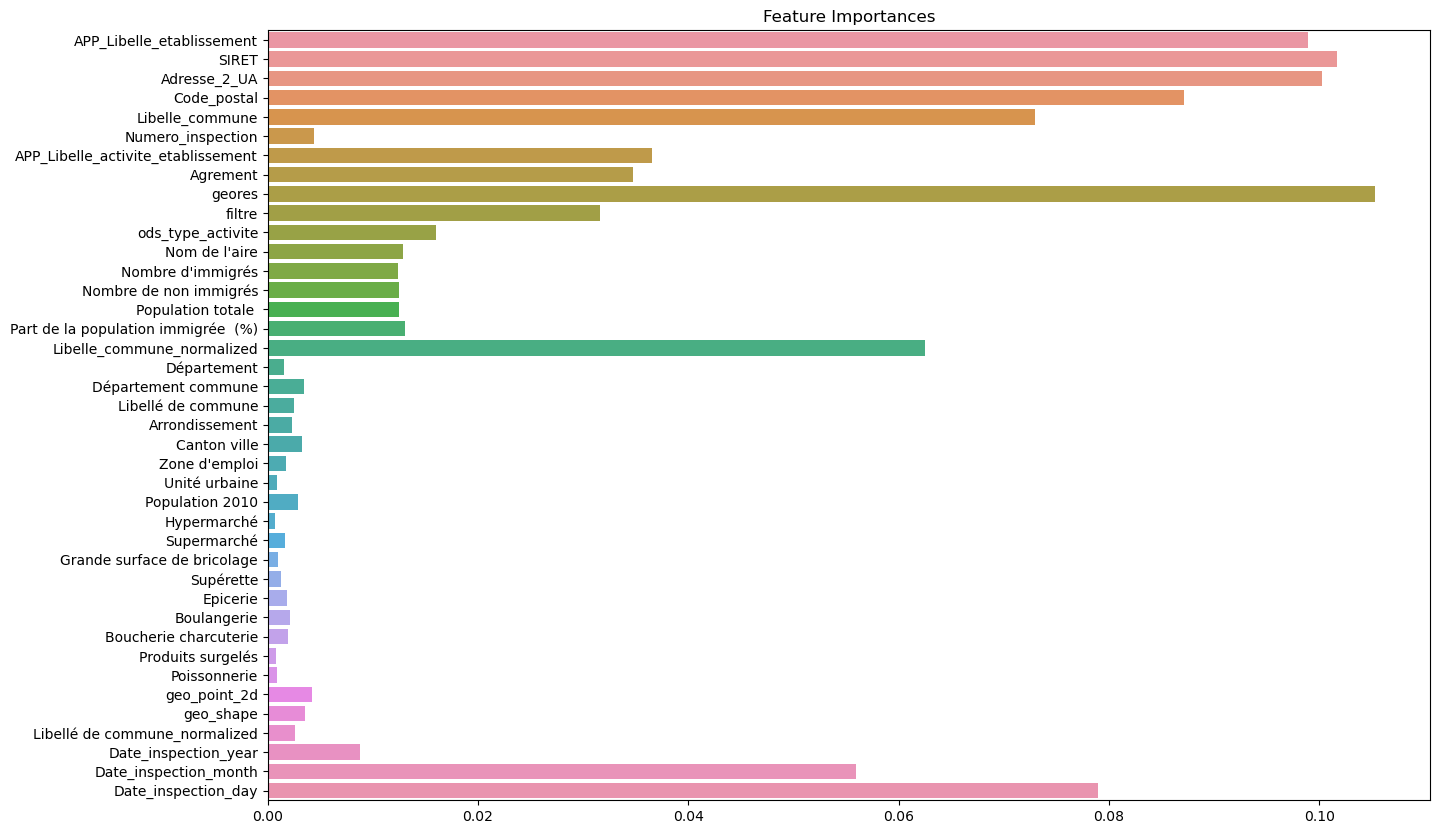

In [23]:
# Récupération des importances des caractéristiques
feature_importances = rf_model.feature_importances_

# Création du graphique
plt.figure(figsize=(15,10))
sns.barplot(x=feature_importances, y=X.columns)
plt.title("Feature Importances")
plt.show()
